In [1]:
import numpy as np
import matplotlib.pyplot as plt

las clases son [1. 2. 3.]
datos de la clase 1.0
[[-0.1306 -1.1811]
 [-0.7306 -0.9711]
 [-0.8506 -0.9011]
 [-0.6806 -0.9611]
 [-0.3806 -0.3111]
 [-0.2806 -0.4311]]
--------------------------------------------------
datos de la clase 2.0
[[-0.2706  0.1489]
 [-0.1106  0.5089]
 [ 0.0594  0.9689]
 [-0.0406  1.4789]
 [-0.0706  1.0189]
 [ 0.0094  0.7389]]
--------------------------------------------------
datos de la clase 3.0
[[ 0.9294  0.2089]
 [ 0.3094 -0.0311]
 [ 0.3594  0.2989]
 [ 0.4694 -0.4011]
 [ 0.5194  0.1789]
 [ 0.8894 -0.3611]]
--------------------------------------------------


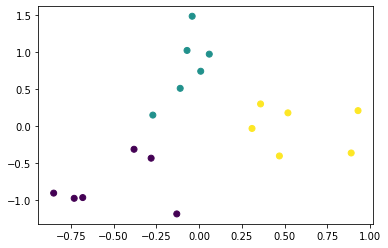

In [2]:
D=[[-0.1306, -1.1811, 1],
    [-0.7306,   -0.9711, 1],
    [-0.8506,   -0.9011, 1],
    [-0.6806,   -0.9611, 1],
    [-0.3806,   -0.3111, 1],
    [-0.2806,   -0.4311, 1], 
    [-0.2706,    0.1489, 2],
    [-0.1106,    0.5089, 2],
    [ 0.0594,    0.9689, 2],
    [-0.0406,    1.4789, 2],
    [-0.0706,    1.0189, 2],
    [ 0.0094,    0.7389, 2],
    [0.9294,    0.2089, 3],
    [0.3094,   -0.0311, 3],
    [0.3594,    0.2989, 3],
    [0.4694,   -0.4011, 3],
    [0.5194,    0.1789, 3],
    [0.8894,   -0.3611, 3]]

D = np.array(D)

clases = np.unique(D[:,2])

print(f'las clases son {clases}')

for clase_i  in clases:
    bin_idx = D[:,2]==clase_i
    print('datos de la clase', clase_i)

    print(D[bin_idx,:2])
    print('-'*50)

plt.scatter(D[:,0],D[:,1], c=D[:,2])

datos de la clase 1.0
promedio clase  1.0 : [-0.50893333 -0.79276667]
desv estandar  1.0 : [0.26047499 0.31237887]
--------------------------------------------------
datos de la clase 2.0
promedio clase  2.0 : [-0.0706      0.81056667]
desv estandar  2.0 : [0.10472185 0.41814737]
--------------------------------------------------
datos de la clase 3.0
promedio clase  3.0 : [ 0.5794     -0.01776667]
desv estandar  3.0 : [0.24344746 0.27547938]
--------------------------------------------------


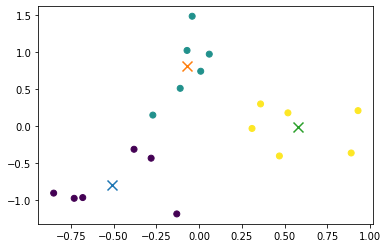

In [3]:
for clase_i  in clases:
    bin_idx = D[:,2]==clase_i
    print('datos de la clase', clase_i)

    a = (D[bin_idx,:2])
    means = np.mean(a, axis=0)
    std_clase_i = np.std(a, axis=0)
    print("promedio clase ", clase_i, ":", means)
    print("desv estandar ", clase_i, ":", std_clase_i)
    print('-'*50)

    plt.scatter(means[0],means[1], marker='x', s=100 )


plt.scatter(D[:,0],D[:,1], c=D[:,2])


[-4.44444444e-05  1.11111111e-05]


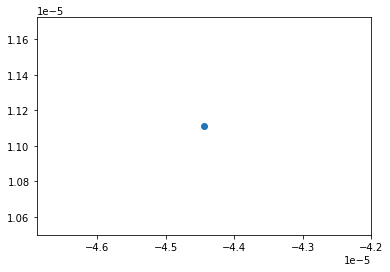

In [4]:
v = np.mean(D[:,:2], axis=0)
print(v)
plt.scatter(v[0], v[1])

In [12]:
from numpy.linalg import inv
v = v.reshape(2,1)
#Cb = [[0,0],[0,0]]
#Cb = Cb.reshape(2,2)

Cb = np.zeros([2,2])
Cw = np.zeros([2,2])

for clase_i  in clases:
    bin_idx = D[:,2]==clase_i
    a = (D[bin_idx,:2])
    means = np.mean(a, axis=0)
    means = means.reshape(2,1)
    resta = means - v
    Cb = 1/3 * (np.matmul(resta, resta.T)) + Cb
    Cw = 1/3*np.cov(a.T)+  Cw
    
tmp = inv(Cw) @ Cb

np.trace(tmp)


6.449126067937389